### Instagram API

In [1]:
client_id = ''
client_secret = ''

from instagram.client import InstagramAPI

# documentation here - https://github.com/Instagram/python-instagram
api = InstagramAPI(client_id=client_id, client_secret=client_secret)

In [2]:
# get ig tag info
used_tag = 'sanbernardino'
ans = api.tag(used_tag).media_count
print ans

178299


In [3]:
import pickle
path = '/class/itpmssd/datasets/'

all_media = pickle.load(open(path+'%s_ig.p' % used_tag,'rb'))

### Building an Instagram co-tag graph

In [4]:
# pip install networkx

import networkx as nx

# functions that help us construct the graph
def graph_add_node(n, g):
    try:
        if g.has_node(n):
            g.node[n]['weight']+=1
        else:
            g.add_node(n)
            g.node[n]['label'] = n
            g.node[n]['weight'] = 1
    except:
        return
            
def graph_add_edge(n1, n2, g):
    if g.has_edge(n1, n2):
        g[n1][n2]['weight']+=1
    else:
        g.add_edge(n1,n2)
        g[n1][n2]['weight']=1

In [5]:
from itertools import combinations

g = nx.Graph()

for m in all_media:
    if not hasattr(m, 'tags'):
        continue
        
    cur_tags = [t.name for t in m.tags]
    for t in m.tags:
        graph_add_node(t.name, g)
        
    for t1, t2 in combinations(cur_tags, 2):
        graph_add_edge(t1, t2, g)

In [6]:
print 'num nodes:', nx.number_of_nodes(g)
print 'num edges:', nx.number_of_edges(g)

num nodes: 32016
num edges: 636227


In [7]:
# pip install community
# pip install python-louvain

from community import *

In [8]:
# partition the graph using Louvain Modularity

part = best_partition(g)

In [9]:
part

{'hellachopper': 0,
 'videogram': 1,
 'makesmesick': 0,
 'iewer1': 0,
 'sanagustin': 2,
 'macro_captures': 3,
 'diamondbacks': 12,
 'woods': 3,
 'mdbp': 4,
 'lovehealsall': 1,
 'pazparaelmundo': 0,
 'tuttomoltobello': 3,
 'aggression': 0,
 'bestintheie': 9,
 'urbandecaycosmetics': 16,
 'nuggrun': 5,
 'werisebyliftingothers': 0,
 'rasberrywine': 3,
 'shootforthestars': 6,
 'originality': 5,
 'jerseycity': 6,
 'minitaxi': 16,
 'alohasnackbar': 0,
 'iliketomakemoneygetturnt': 7,
 'christmaspresents': 3,
 'farmersapp': 16,
 'sexyladiesthatlift': 1,
 'parasiempre': 2,
 'lumix': 3,
 'sliveredalmonds': 18,
 'fashiondesigner': 8,
 'essential17hairgrowthoil': 12,
 'eggrolls': 2,
 'sulfatefree': 9,
 'msbeauty': 8,
 'broward': 8,
 'fractal': 10,
 'tacticalgear': 0,
 'markers': 18,
 'shotsaftershots': 8,
 'cashout': 9,
 'timetoturnup': 9,
 'commenter': 6,
 'dankster': 5,
 'wednesday': 0,
 'altagracia': 2,
 u'cristiannu\xf1ez': 3,
 'gottohavemyfuntoo': 3,
 'civildefense': 0,
 'bloglovin': 0,
 'staf

In [10]:
part_vals = sorted(set(part.values()))
part_hist = [part.values().count(x) for x in part_vals]

Populating the interactive namespace from numpy and matplotlib
top 10 clusters:
cluster 0 has 11346 members
cluster 3 has 4204 members
cluster 9 has 2554 members
cluster 5 has 1716 members
cluster 7 has 1518 members
cluster 12 has 1210 members
cluster 16 has 1068 members
cluster 6 has 1066 members
cluster 15 has 1041 members
cluster 1 has 1026 members


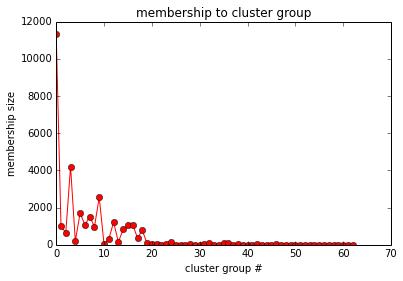

In [11]:
%pylab inline

plot(part_vals, part_hist, 'ro-')
title('membership to cluster group')
xlabel('cluster group #')
ylabel('membership size')
rcParams['figure.figsize'] = 16,8

top_clusters = []
limit = 10
print 'top %s clusters:' % limit
for i in sorted(part_hist, reverse=True)[:limit]:
    print 'cluster %s has %s members' % (part_hist.index(i), i)
    top_clusters.append(part_hist.index(i))

In [16]:
cl_cen = {}

for c in top_clusters:
    g_sub=g.subgraph(g.nbunch_iter([x for x,y in part.items() if y==c]))
    avg_deg = round(mean(nx.degree(g_sub).values()),5)
    
    # calculate degree centrality per node
    cl_cen[c] = nx.degree_centrality(g_sub)

    print '%s) avg_deg:%s [%s,%s]' % (c, avg_deg, g_sub.order() ,g_sub.size())

0) avg_deg:25.07879 [11346,142272]
3) avg_deg:26.02854 [4204,54712]
9) avg_deg:29.30932 [2554,37428]
5) avg_deg:27.41725 [1716,23524]
7) avg_deg:26.18709 [1518,19876]
12) avg_deg:61.33058 [1210,37105]
16) avg_deg:19.94007 [1068,10648]
6) avg_deg:19.1182 [1066,10190]
15) avg_deg:17.53698 [1041,9128]
1) avg_deg:22.47758 [1026,11531]


In [17]:
# show top words from within clusters, sorted by node centrality
for c in top_clusters:

    members = {}  
    
    for m_id in [x for x,y in part.items() if y==c]:
        cur_sn = g.node[m_id]['label']
        cur_deg = round(cl_cen[c][cur_sn],4)
        
        members[cur_sn]=cur_deg
    
    print 'cluster %s' % c
    print sorted(members.items(), key=lambda x: -x[1])[:30]
    print ''


cluster 0
[('sanbernardino', 0.9998), ('california', 0.3149), ('prayforsanbernardino', 0.2567), ('guncontrol', 0.1561), ('peace', 0.1497), ('shooting', 0.1479), ('pray', 0.1345), ('massshooting', 0.1251), ('prayers', 0.1226), ('america', 0.1161), ('usa', 0.1129), ('repost', 0.098), ('guns', 0.0953), ('falseflag', 0.0876), ('terrorism', 0.0869), ('police', 0.0748), ('cali', 0.0739), ('sanbernardinoshooting', 0.0726), ('news', 0.0723), ('god', 0.0703), ('isis', 0.0693), ('prayfortheworld', 0.064), ('obama', 0.0628), ('life', 0.0626), ('prayer', 0.0615), ('prayforcalifornia', 0.0581), ('nra', 0.0572), ('wakeup', 0.0567), ('sad', 0.056), ('gunviolence', 0.0559)]

cluster 3
[('socal', 0.2113), ('mountains', 0.1956), ('nature', 0.1832), ('beautiful', 0.1577), ('instagood', 0.153), ('travel', 0.1242), ('picoftheday', 0.123), ('sunset', 0.1187), ('hiking', 0.1109), ('explore', 0.0992), ('adventure', 0.094), ('vscocam', 0.0904), ('clouds', 0.0866), ('photography', 0.0854), ('sky', 0.0842), ('in

In [18]:
path = '/class/itpmssd/datasets/'
nx.write_gexf(g, path+'%s_insta_tags.gexf' % used_tag)
print path+'%s_insta_tags.gexf' % used_tag

/class/itpmssd/datasets/sanbernardino_insta_tags.gexf


### Now let's add location

In [61]:
import networkx as nx

def graph_add_node(n, g, params):
    
    try:
        if g.has_node(n):
            g.node[n]['weight']+=1
        else:
            g.add_node(n)
            g.node[n]['weight'] = 1
            for k,v in params.items():
                g.node[n][k]=v
    except:
        return
            
def graph_add_edge(n1, n2, weight, g):
    g.add_edge(n1,n2)
    g[n1][n2]['weight']=weight

In [50]:
# what should our edges be?
# Let's try to show users with overlapping tags

from collections import defaultdict

tag_info = defaultdict(set)
users_to_tags = defaultdict(set)

for m in all_media:
    for tag in [t.name for t in m.tags]:
        tag_info[tag].add(m.user.id)
        users_to_tags[m.user.id].add(tag)

In [56]:
g = nx.DiGraph()

# add nodes only to those users with geo location
for m in all_media:
    
    if not hasattr(m, 'tags'):
        continue
        
    if not hasattr(m, 'location'):
        continue
        
    try:
        params = {'label':m.user.username, 
                  'likes':m.like_count, 
                  'comments':m.comment_count,
                  'location_name':m.location.name, 
                  'lat':m.location.point.latitude, 
                  'lng':m.location.point.longitude
                  }
    
        graph_add_node(m.user.id, g, params)
        
    except:
        continue

In [51]:
# here we get all users who used a hashtag
tag_info['prayfor']

{'1335592997',
 '14442961',
 '1822443448',
 '2000421236',
 '2128748951',
 '2130803277',
 '294170894',
 '41747131',
 '46908187',
 '662183428'}

In [53]:
users_to_tags['2130803277']

{'beirut',
 'bombing',
 'greenparty',
 'isis',
 'itsinourhands',
 'jillstein',
 'nigeria',
 'paris',
 'peace',
 'peaceonearth',
 'prayfor',
 'sanbernardino',
 'shooting',
 'solution',
 'somethingsgottagive',
 'terrorism'}

In [54]:
# now lets generate a list of edges -> users who have at least 2 tags in common

edgelist = defaultdict(int)

for u1,u2 in combinations(users_to_tags.keys(), 2):
    t1 = users_to_tags[u1]
    t2 = users_to_tags[u2]
    
    # if the two users have more than one tag in common, add them to our edgelist
    if len(t1 & t2)>1:
        edgelist[(u1,u2)]=len(t1 & t2)
    

In [58]:
edgelist.keys()

[('193649902', '2014842412'),
 ('226151843', '2291961287'),
 ('2288028100', '2266978510'),
 ('1449912488', '270633905'),
 ('2040108356', '227015238'),
 ('1814744306', '1579672983'),
 ('262080302', '27784803'),
 ('377901774', '175350875'),
 ('1631347018', '36807331'),
 ('180320317', '1618192906'),
 ('469912938', '8792484'),
 ('205911917', '15158794'),
 ('249173506', '216588024'),
 ('2084498880', '1542430186'),
 ('590655979', '2142184211'),
 ('1554659411', '2304691699'),
 ('210865116', '1943717163'),
 ('14023499', '1901656398'),
 ('285834312', '54593561'),
 ('1212407414', '1978537330'),
 ('12406940', '247733856'),
 ('2058962216', '1011241304'),
 ('4529251', '15449142'),
 ('485959596', '1921166527'),
 ('454393639', '1735538893'),
 ('2227419698', '53899559'),
 ('227813719', '273943744'),
 ('1344378479', '2273788972'),
 ('252705569', '2255860394'),
 ('1166269053', '768213541'),
 ('51676283', '1017902393'),
 ('1925732628', '1508528949'),
 ('206399760', '203446239'),
 ('1406087186', '26463383

In [63]:
for n1,n2 in combinations(g.nodes(), 2):
    ans = edgelist.get((n1,n2), None) or edgelist.get((n1,n2), None)
    if ans:
        graph_add_edge(n1,n2,ans,g)

In [64]:
print g.number_of_nodes()
print g.number_of_edges()

1737
109810


In [65]:
nx.write_gexf(g, path+'%s_insta_location.gexf' % used_tag)
print path+'%s_insta_location.gexf' % used_tag

/class/itpmssd/datasets/sanbernardino_insta_location.gexf


<img src="http://i.imgur.com/06mvfnK.png"/>

<img src="http://i.imgur.com/lChkrbz.png"/>

<img src="http://i.imgur.com/tGpaULp.png"/>